In [153]:
%matplotlib inline

In [154]:
!pip install pandas

In [155]:
!pip install seaborn

In [156]:
!pip install scikit-learn

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense,Dropout, BatchNormalization, LeakyReLU

In [158]:
import os
import tensorboard
import time

In [159]:
pip install scikit-plot

In [160]:
import scikitplot as skplt

## I. Load data

In [724]:
obesity_data = pd.read_csv("C:\BANGKITS\diabet\ObesityDataSet_raw_and_data_sinthetic.csv")

In [725]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [726]:
obesity_data.shape

(2111, 17)

## II. Data Explore

In [727]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [728]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

#### Gender

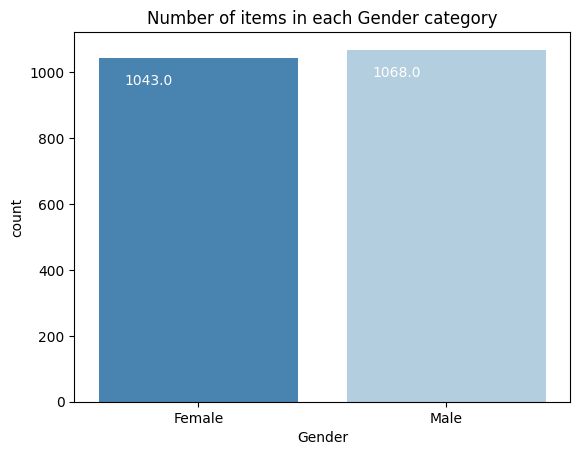

In [729]:
count_values(obesity_data, "Gender")

#### Age

In [730]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [731]:
obesity_data["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [732]:
obesity_data["Age"].median()

22.77789

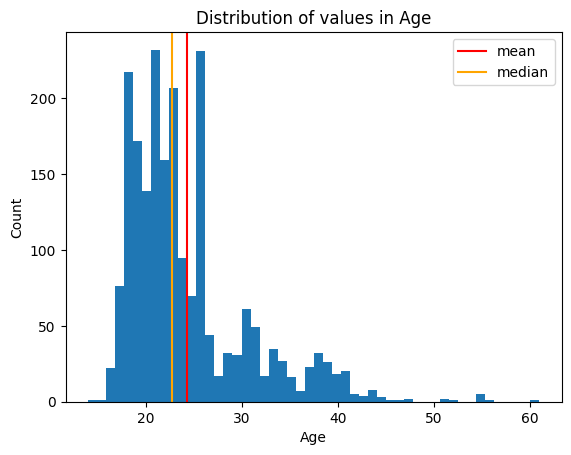

In [733]:
plot_distribution(obesity_data, "Age")

#### Height

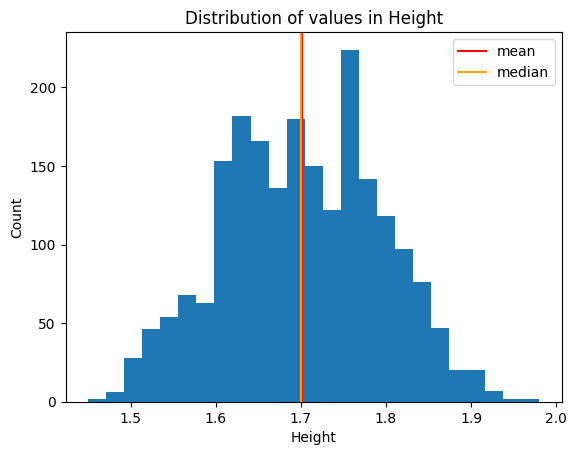

In [734]:
plot_distribution(obesity_data, "Height")

#### Weight

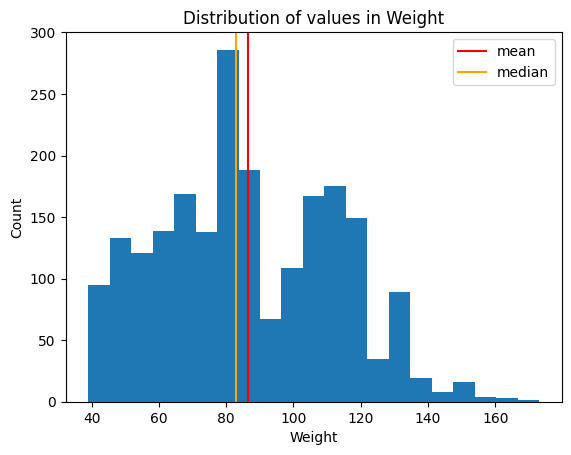

In [735]:
plot_distribution(obesity_data, "Weight")

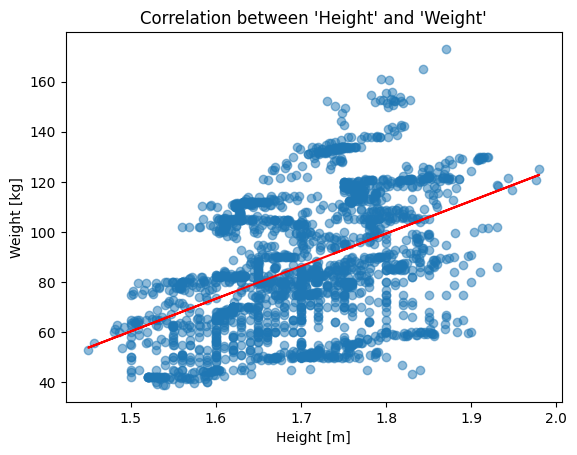

In [736]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

#### Does overweight run in the family? 

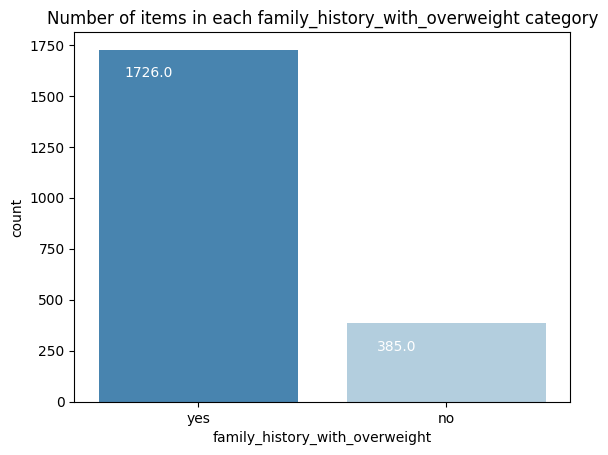

In [737]:
count_values(obesity_data, "family_history_with_overweight")

#### Consumption of high caloric food

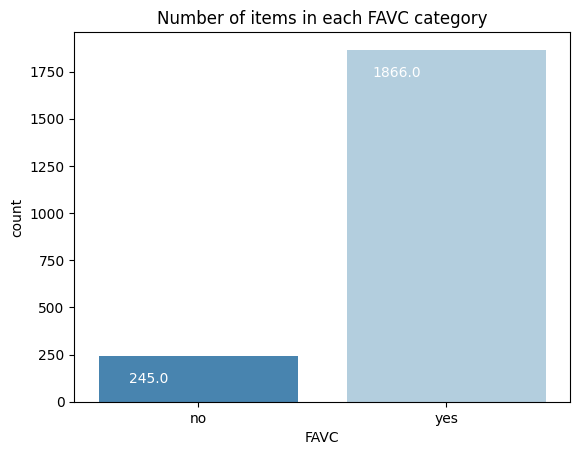

In [738]:
count_values(obesity_data, "FAVC")

#### Consumption of vegetables

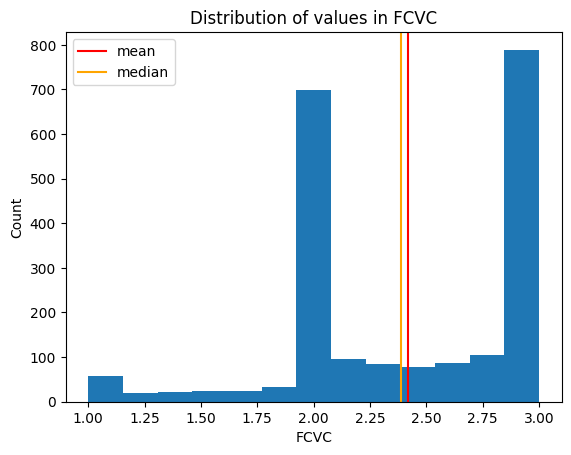

In [739]:
plot_distribution(obesity_data, "FCVC")

#### Meals per day

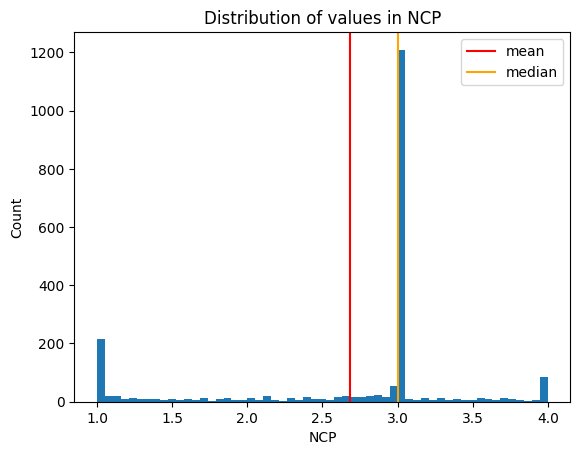

In [740]:
plot_distribution(obesity_data, "NCP")

#### Food between meals

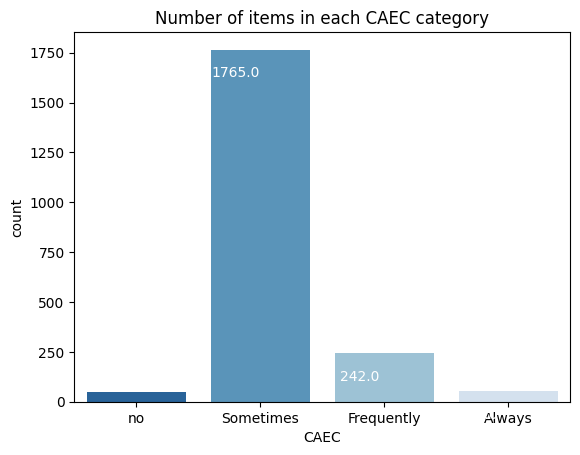

In [741]:
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

#### Smoke

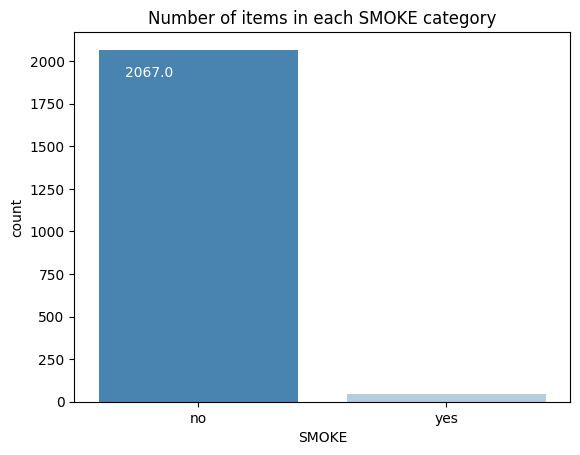

In [742]:
count_values(obesity_data, "SMOKE")

#### Drink water

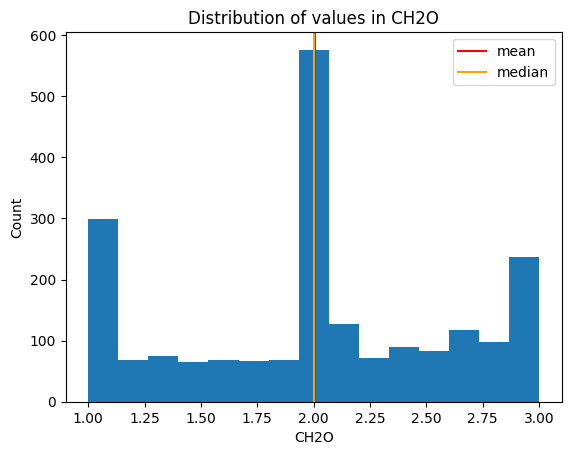

In [743]:
plot_distribution(obesity_data, "CH2O")

#### Monitor intake of calories 

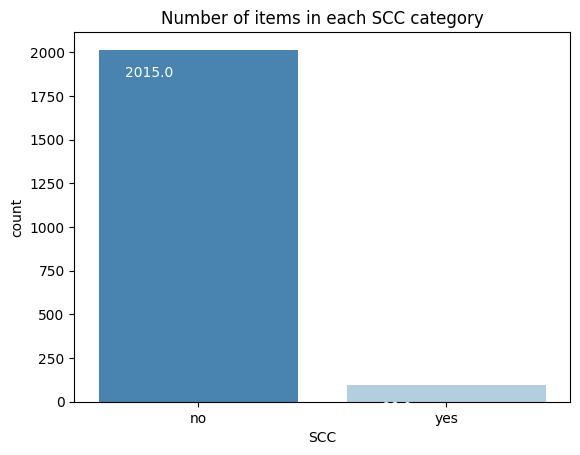

In [744]:
count_values(obesity_data, "SCC")

#### Physical activity

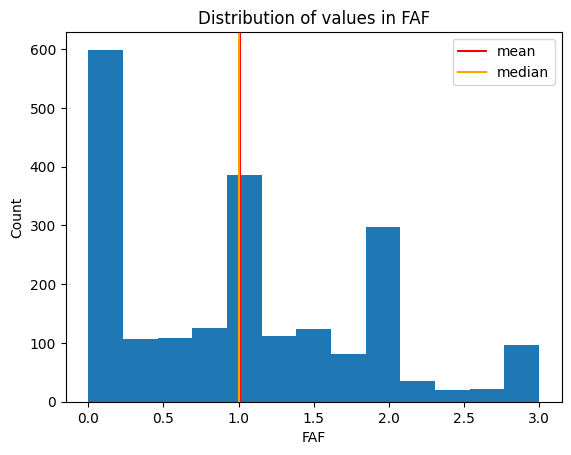

In [745]:
plot_distribution(obesity_data, "FAF")

#### Time spent on technological devices

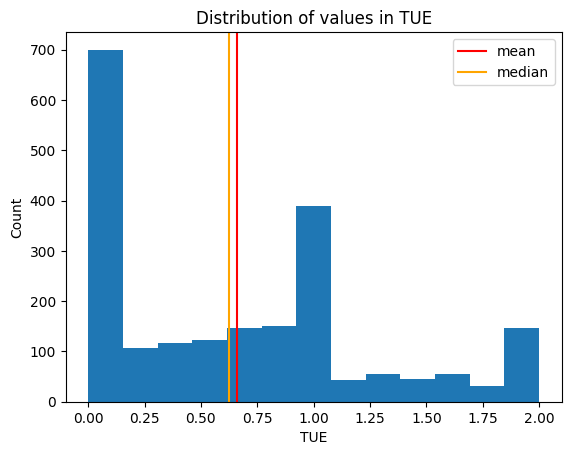

In [746]:
plot_distribution(obesity_data, "TUE")

#### Drink alcohol

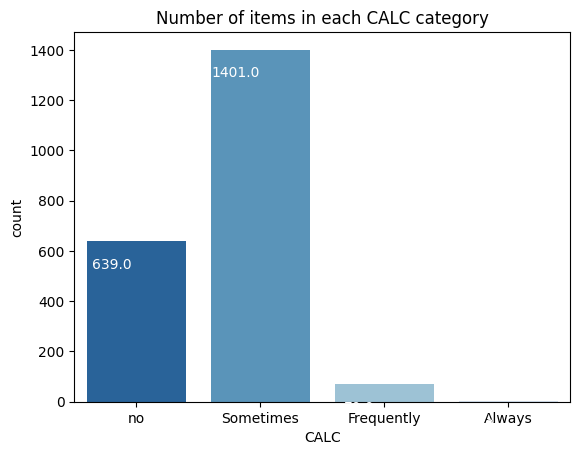

In [747]:
count_values(obesity_data, "CALC")

#### Transportation

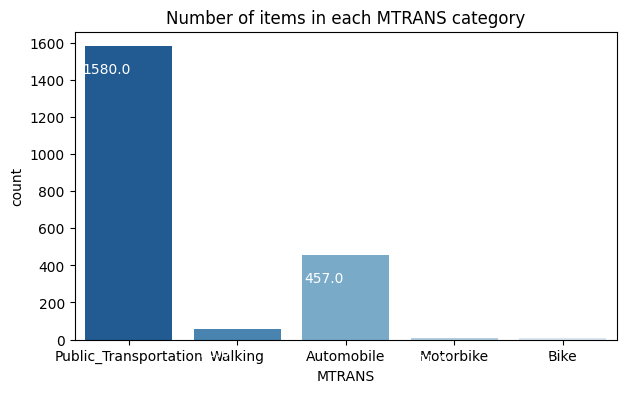

In [748]:
plt.figure(figsize = (7, 4))
count_values(obesity_data, "MTRANS")

#### Normal, Overweight or Obese?

According to their `Body mass index (BMI)`:

* Underweight if BMI < 18.5
* Normal if BMI 18.5 - 24.9 
* Overweight if BMI 25.0 - 29.9
* Obesity I if BMI 30.0 - 34.9
* Obesity II if BMI 35.0 to 39.9
* Obesity III if BMI > 40

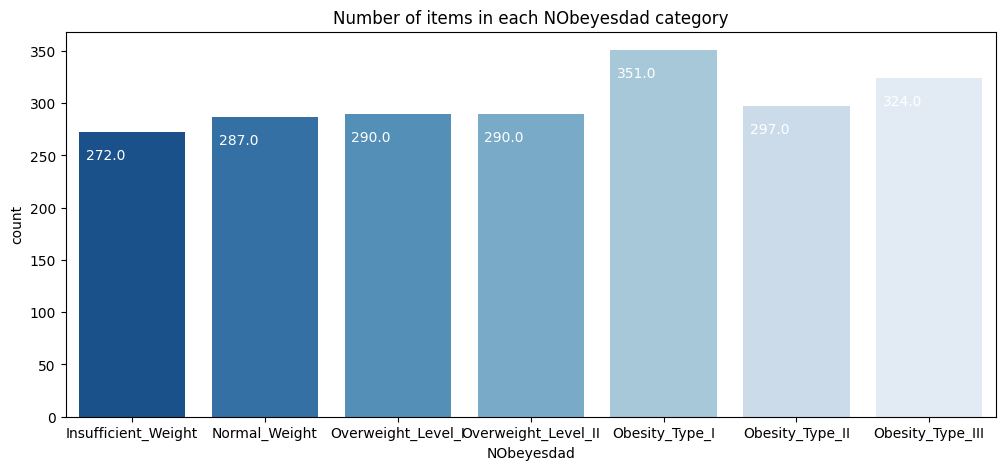

In [749]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [750]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

##### Overweight and Gender

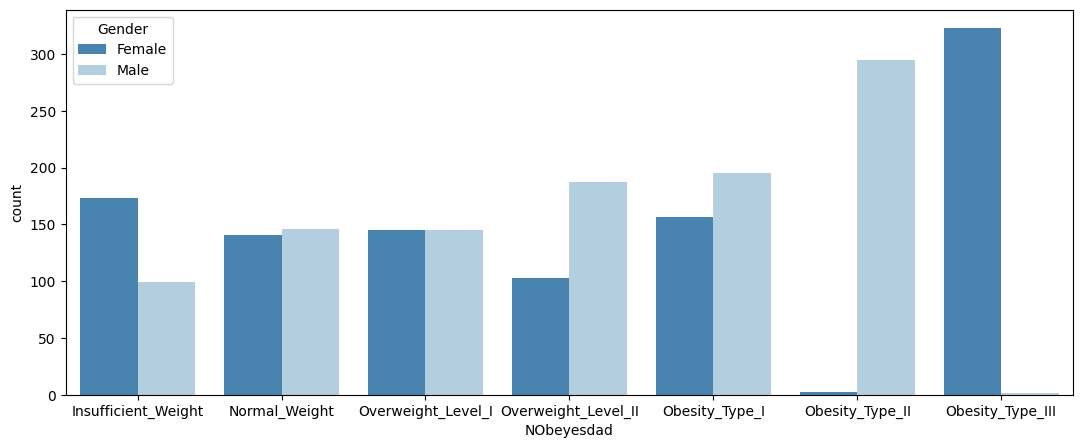

In [751]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

##### Overweight and family history

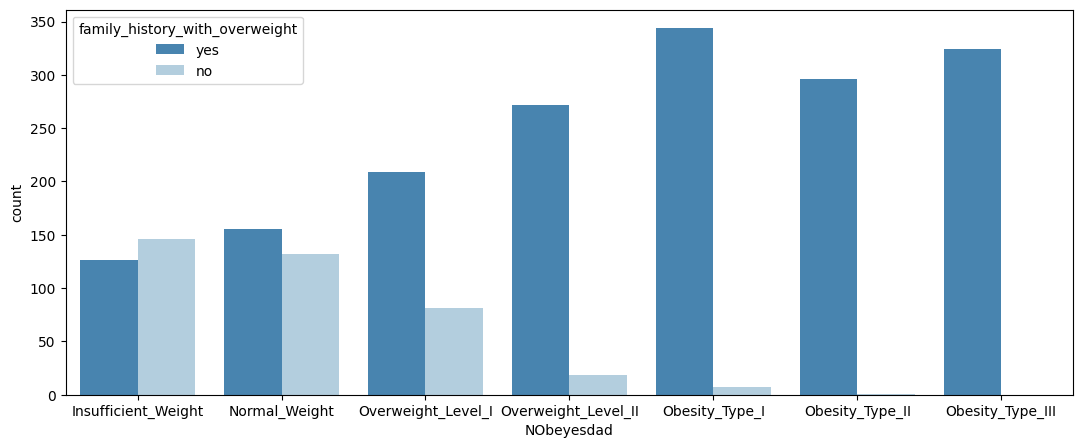

In [752]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

##### Overweight and high calories food

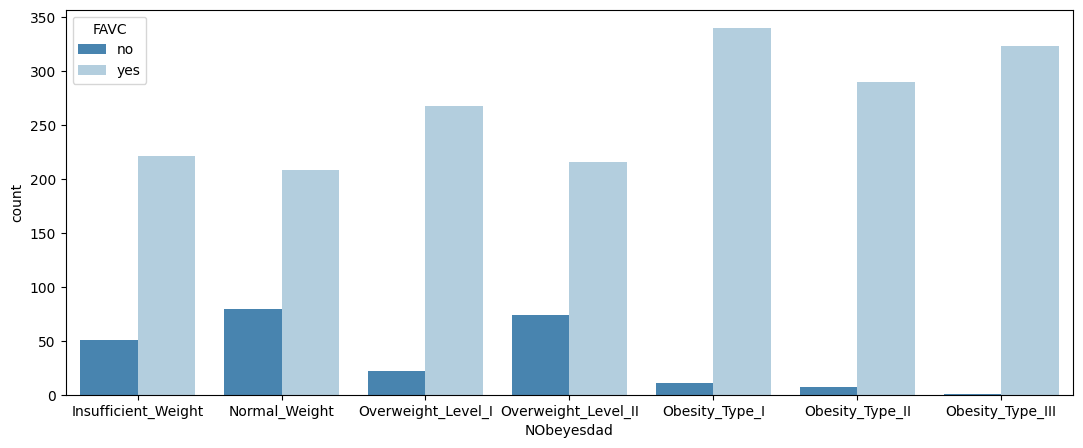

In [753]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

##### Overweight and food between meals

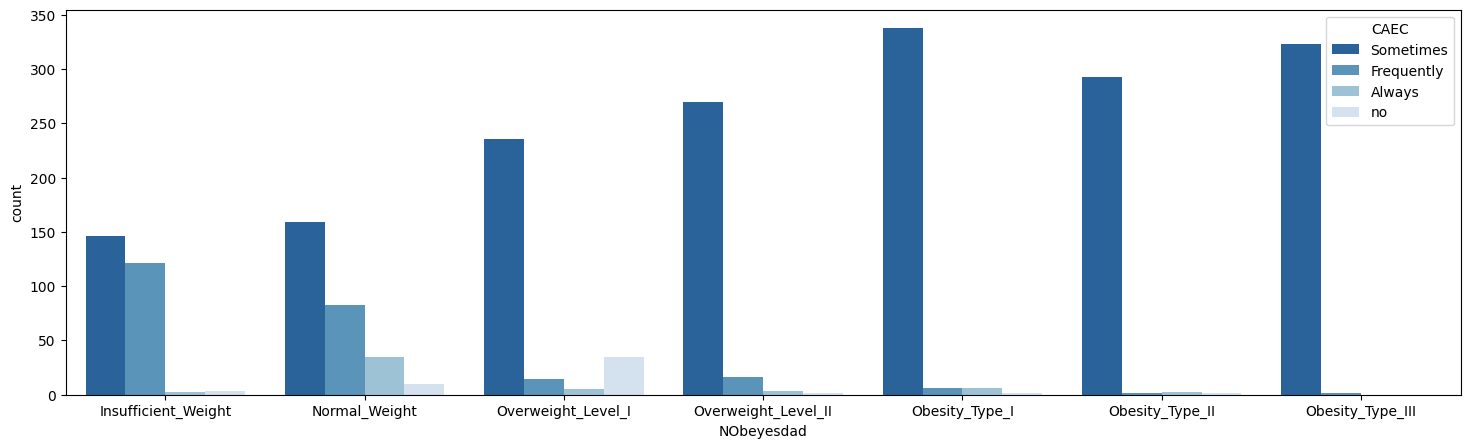

In [754]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

##### Overweight and smoking

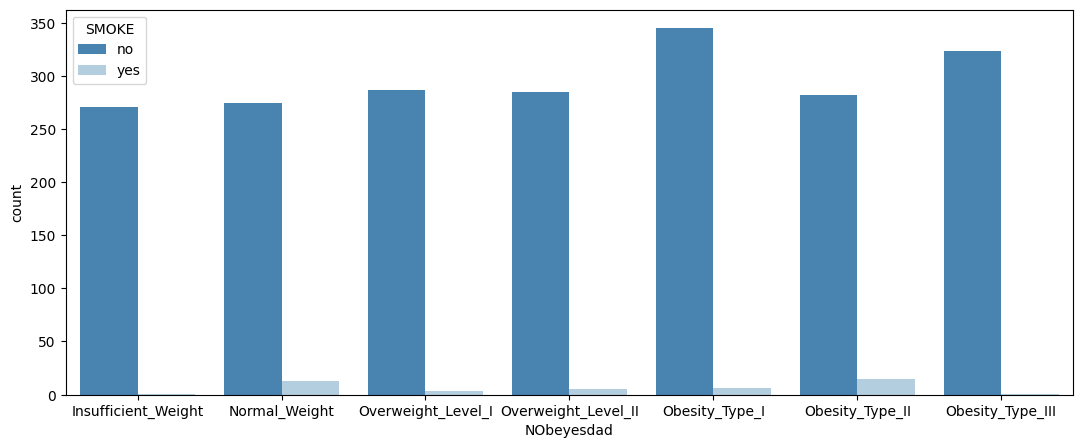

In [755]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

##### Overweight and monitoring calories

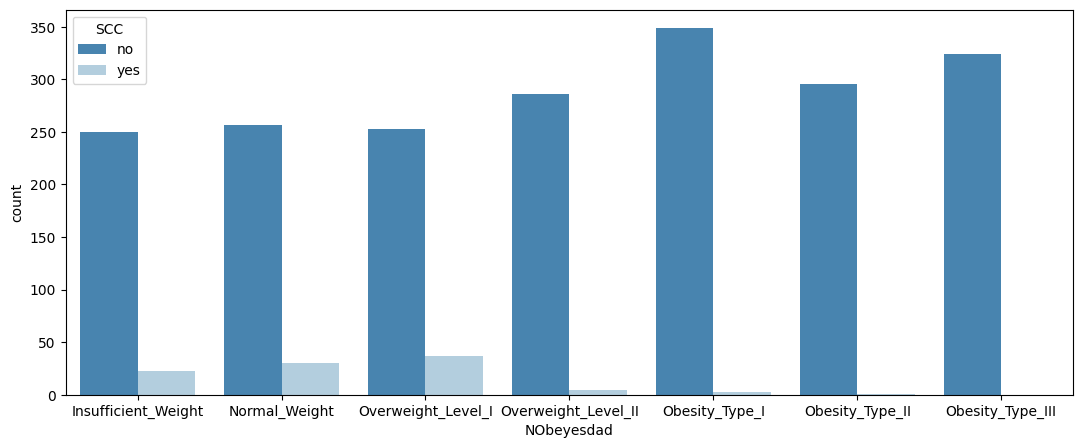

In [756]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

##### Overweight and alcohol

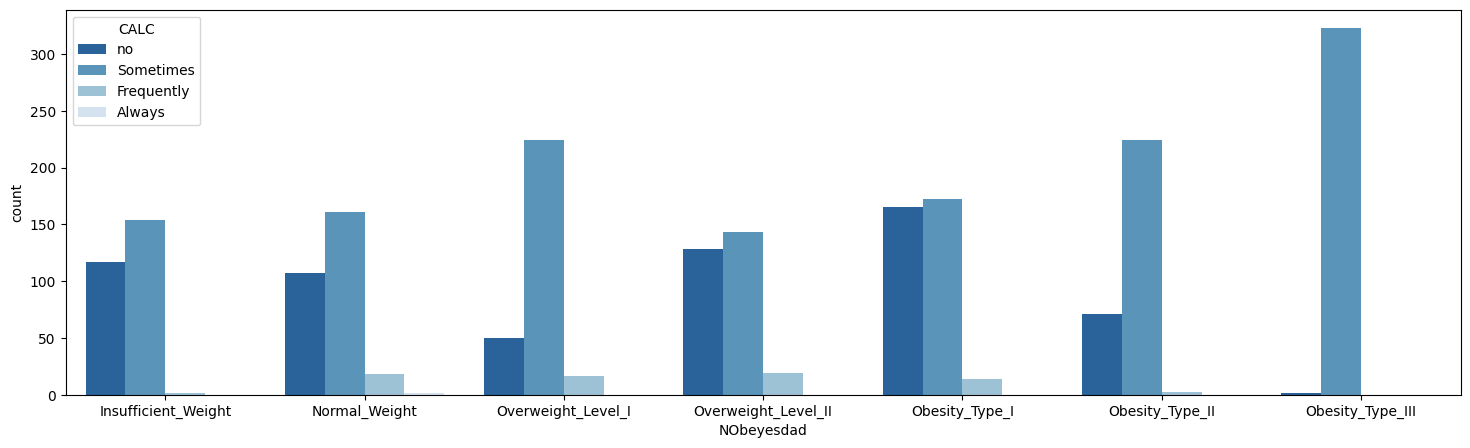

In [757]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

##### Overweight and means of transport

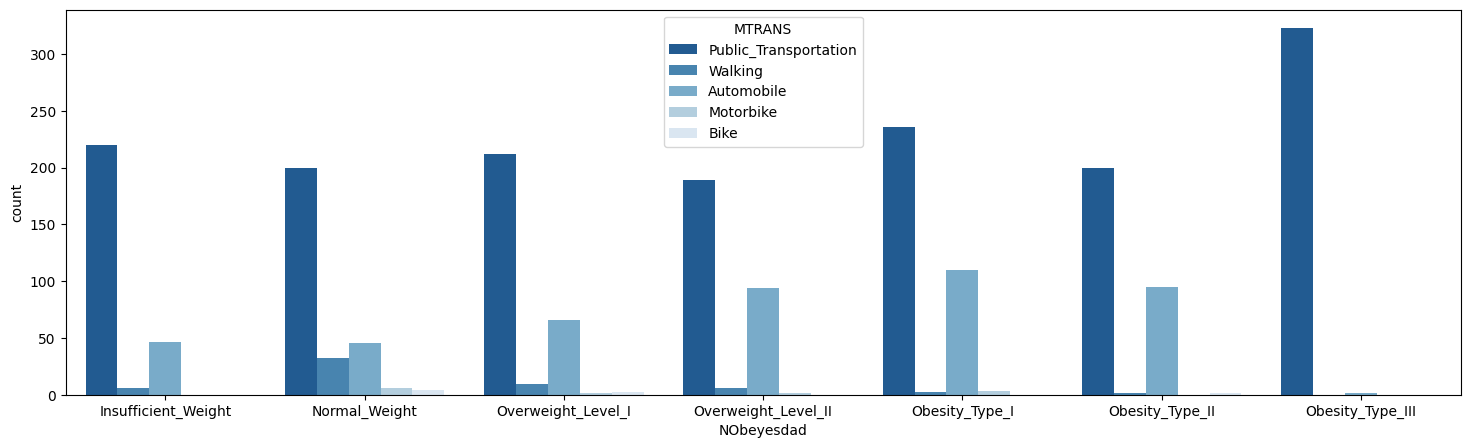

In [758]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

### II. 2. Explore Statistics

In [759]:
obesity_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [760]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

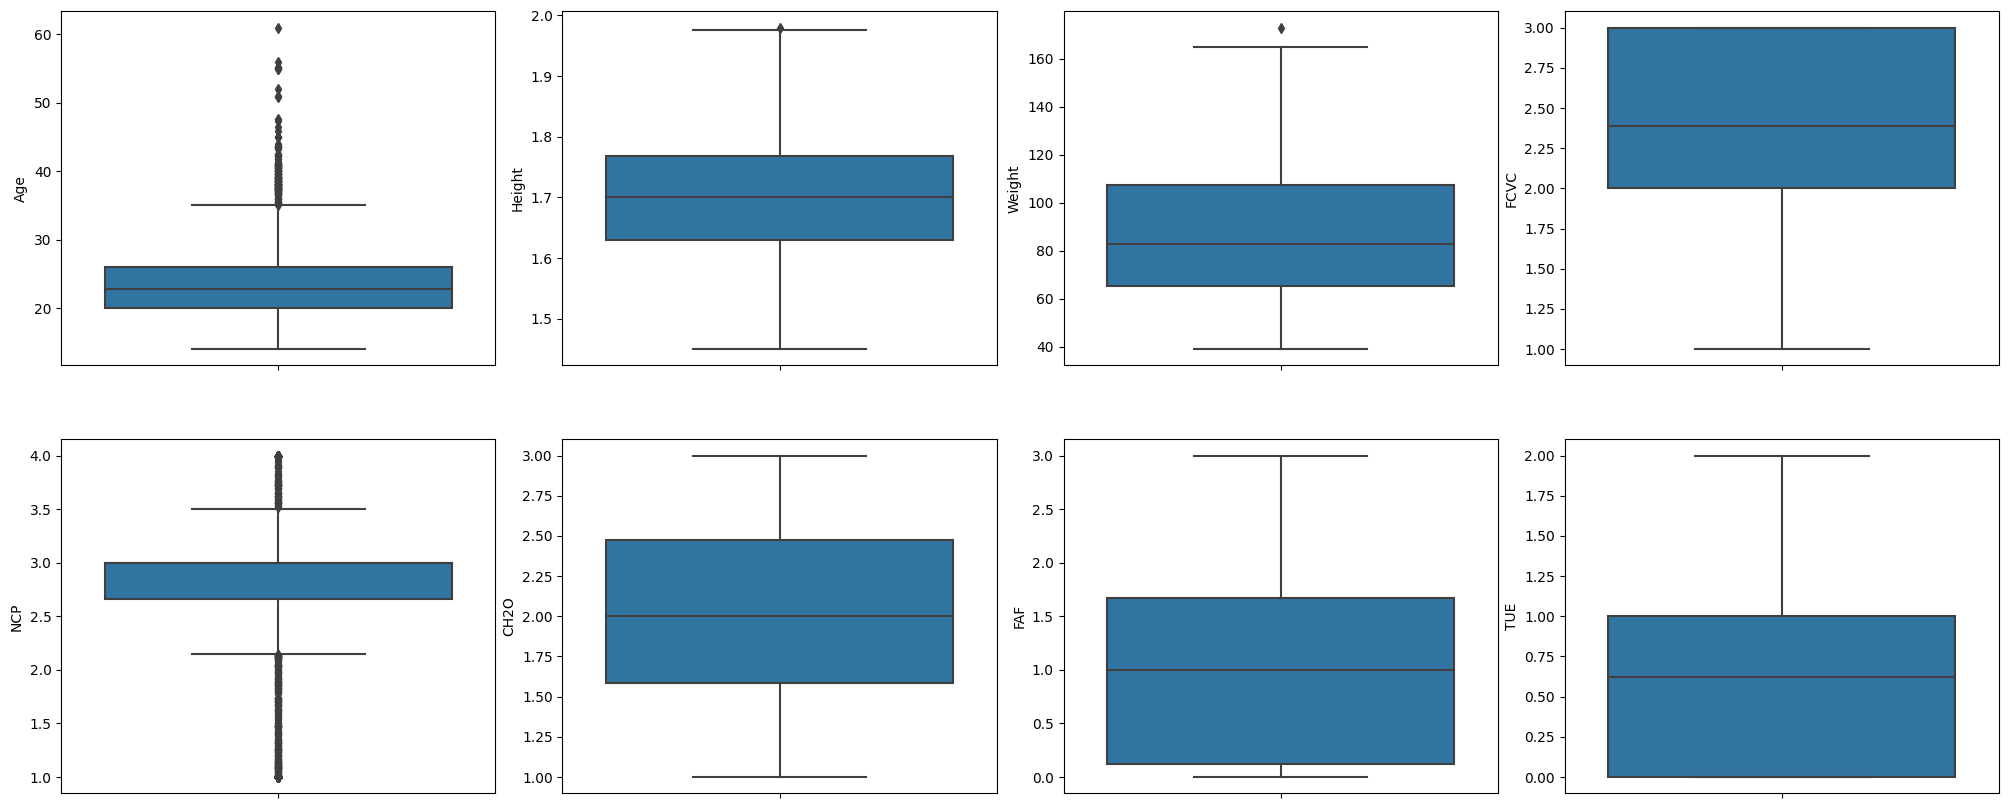

In [761]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

(Linear) correlation between numeric features is weak or nonexistent. Thus, all features remain in the table.

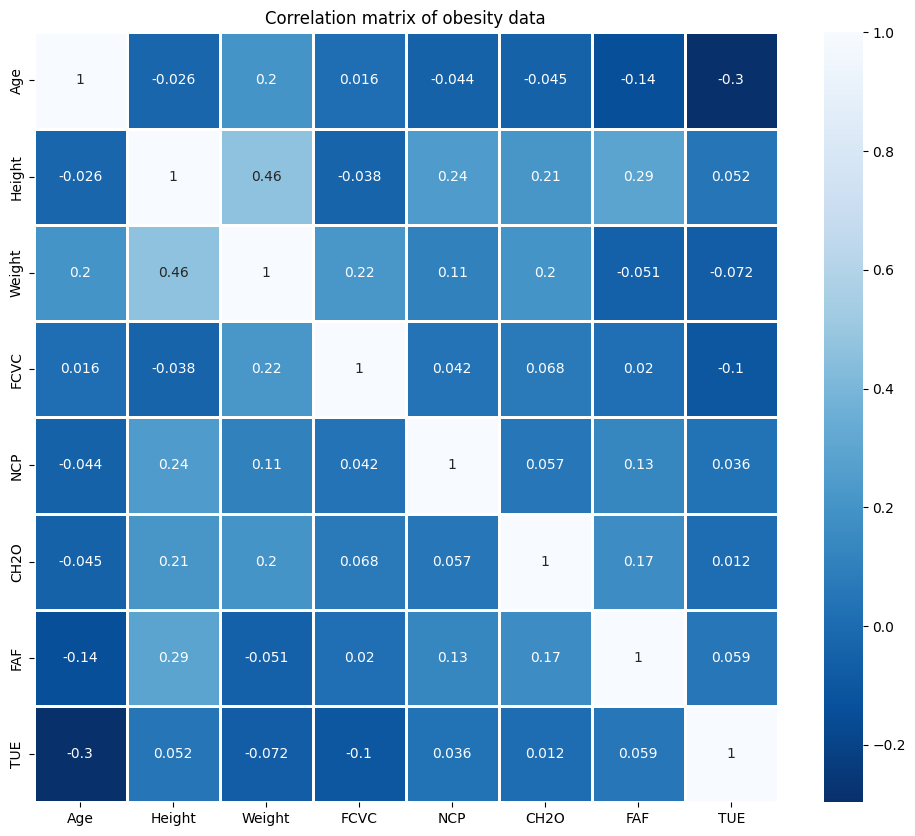

In [762]:
plt.figure(figsize = (12, 10))
sns.heatmap(obesity_data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

## III. Data pre-processing

In [763]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [764]:
obesity_lab = obesity_data[["NObeyesdad"]]

In [765]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [766]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


### III.2 Separate Features and Labels

In [767]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)

In [768]:
obesity_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

### III.3 Drop Some Features and Convert Numerical Values

In [769]:
obesity_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   uint8  
 9   Gender_Male                         2111 non-null   uint8  
 10  family_history_with_overweight_no   2111 non-null   uint8  
 11  family_history_with_overweight_yes  2111 no

In [770]:
obesity_features.drop(obesity_features.columns[12:31], axis = 1, inplace=True)

In [771]:
obesity_features.drop(obesity_features.columns[3:12], axis = 1, inplace=True)

In [772]:
#obesity_features.drop(obesity_features.columns[3], axis = 1, inplace=True)

In [773]:
obesity_features.drop(obesity_features.columns[0], axis = 1, inplace=True)

In [774]:
obesity_features.drop(range(498, 2111), inplace=True)

In [775]:
obesity_features

,Height,Weight
0,1.62,64.0
1,1.52,56.0
2,1.80,77.0
3,1.80,87.0
4,1.78,89.8
...,...,...
493,1.80,65.0
494,1.67,66.0
495,1.80,60.0
496,1.72,53.0


In [776]:
obesity_features = obesity_features.astype("float")

In [777]:
obesity_features.dtypes

Height    float64
Weight    float64
dtype: object

### III.4 Scale Features

In [801]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [802]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0.18656716, 0.12686567, 0.28358209, 0.35820896, 0.37910448,
        0.10447761, 0.09433962, 0.10447761, 0.18656716, 0.21641791,
        0.49253731, 0.30597015, 0.12686567, 0.44776119, 0.15671642,
        0.20149254, 0.47014925, 0.1509434 , 0.32089552, 0.23134328,
        0.30597015, 0.35820896, 0.15671642, 0.28301887, 0.21641791,
        0.08208955, 0.19402985, 0.09701493, 0.2761194 , 0.23134328,
        0.32835821, 0.21641791, 0.2761194 , 0.38059701, 0.17164179,
        0.09433962, 0.07462687, 0.06716418, 0.20895522, 0.36567164,
        0.26865672, 0.15671642, 0.18656716, 0.17164179, 0.30597015,
        0.1509434 , 0.24626866, 0.24626866, 0.15671642, 0.08208955,
        0.11567164, 0.03731343, 0.09701493, 0.11940299, 0.11940299,
        0.17164179, 0.23134328, 0.19402985, 0.20895522, 0.11940299,
        0.07462687, 0.14179104, 0.17164179, 0.11940299, 0.13432836,
        0.2238806 , 0.38059701, 0.37735849, 0.54477612, 0.15671642,
        0.30597015, 0.08208955, 0.15671642, 0.19

### III.5 Encode Labels

In [803]:
encoder = LabelEncoder()

In [804]:
encoder.fit(obesity_label)

LabelEncoder()

In [805]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [806]:
obesity_labels_encoded = encoder.transform(obesity_label)

In [807]:
obesity_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

In [808]:
df1 = pd.DataFrame(obesity_labels_encoded, columns=['Obesity Level'])

In [809]:
df1.drop(range(498, 2111), inplace=True)

In [821]:
result = pd.concat([obesity_features_scaled, df1], axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [811]:
result

,Height,Weight,Obesity Level
0,1.62,64.0,1
1,1.52,56.0,1
2,1.80,77.0,1
3,1.80,87.0,5
4,1.78,89.8,6
...,...,...,...
493,1.80,65.0,1
494,1.67,66.0,1
495,1.80,60.0,1
496,1.72,53.0,0


### III.6 Train - Test split

In [812]:
x_train,x_test,y_train,y_test  = train_test_split(obesity_features, df1, 
                test_size = 0.2, shuffle = True, stratify = df1)
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.02, shuffle = True)

print(len(x_train), 'train examples')
print(len(x_test), 'test examples')
print(len(x_val), 'val examples')
print(len(y_train), 'train examples')
print(len(y_test), 'test examples')
print(len(y_val), 'train examples')

390 train examples
100 test examples
8 val examples
390 train examples
100 test examples
8 train examples


In [813]:
x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape

((390, 2), (100, 2), (8, 2), (390, 1), (100, 1), (8, 1))

In [814]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [815]:
x_train = x_train.reshape(390, 2, 1)
x_test = x_test.reshape(100, 2, 1)
x_val = x_val.reshape(8, 2, 1)

In [816]:
x_train.shape,x_test.shape,x_val.shape

((390, 2, 1), (100, 2, 1), (8, 2, 1))

## IV. Train model to classify data into obesity categories

In [817]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv1D(filters=64,kernel_size=1,activation='relu',input_shape=(2,1)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dropout(0.2),

                             tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 2, 64)             128       
_________________________________________________________________
batch_normalization_20 (Batc (None, 2, 64)             256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 2, 64)             4160      
_________________________________________________________________
batch_normalization_21 (Batc (None, 2, 64)             256       
_________________________________________________________________
flatten_14 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)             

In [818]:
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [819]:
import datetime, os
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [820]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    verbose=1,
                    epochs=1500, callbacks=[tensorboard_callback,callbacks])

Epoch 1/1500
13/13 [==============================] - 0s 20ms/step - loss: 3.3718 - accuracy: 0.1051 - val_loss: 0.8150 - val_accuracy: 0.1000
Epoch 2/1500
13/13 [==============================] - 0s 5ms/step - loss: 2.8011 - accuracy: 0.0949 - val_loss: 0.7953 - val_accuracy: 0.0800
Epoch 3/1500
13/13 [==============================] - 0s 5ms/step - loss: 2.6427 - accuracy: 0.0872 - val_loss: 0.8014 - val_accuracy: 0.0900
Epoch 4/1500
13/13 [==============================] - 0s 5ms/step - loss: 2.1039 - accuracy: 0.1051 - val_loss: 0.8050 - val_accuracy: 0.0800
Epoch 5/1500
13/13 [==============================] - 0s 5ms/step - loss: 1.9716 - accuracy: 0.1128 - val_loss: 0.8047 - val_accuracy: 0.0700
Epoch 6/1500
13/13 [==============================] - 0s 5ms/step - loss: 1.4685 - accuracy: 0.1359 - val_loss: 0.7943 - val_accuracy: 0.0700
Epoch 7/1500
13/13 [==============================] - 0s 5ms/step - loss: 1.4493 - accuracy: 0.1487 - val_loss: 0.7844 - val_accuracy: 0.0700
Epoch

KeyboardInterrupt: 